In [227]:
import numpy as np
from scipy import optimize


# Function to optimize:
#   * x[i] = position of elevator number i

def time(x):
    T = (1+min(x))*600
    for i in range(30):
        T += (1+min([np.abs(i-x[0]),np.abs(i-x[1]),np.abs(i-x[2])]))*20

    return T

# We want to maximize the profit, but python naturally minimizes functions, so define a new function that does the following
#  * - profit => so minimizing the new function is equivalent to maximizing the original profit function
#  * adds a large penalty when the variables x and y are negative 
time_pen = lambda x: time(x) + 1000*((x[0]<0) + (x[1]<0) + (x[2]<0))

# Initial guess
x0=[5,10,15]

# Optimize the problem using the function fmin
sol = optimize.fmin(time_pen, x0)

# Report the results
print()
print('The elevators should be located at:')
print('   Elevator 1 on floor ',sol[0])
print('   Elevator 2 on floor ',sol[1])
print('   Elevator 3 on floor ',sol[2])

Optimization terminated successfully.
         Current function value: 2940.000066
         Iterations: 124
         Function evaluations: 231

The elevators should be located at:
   Elevator 1 on floor  4.371016527455962e-08
   Elevator 2 on floor  12.106232494580468
   Elevator 3 on floor  24.000002224317633


In [196]:
time([0,sol[1],sol[2]])

2940.0000444863526

In [197]:
time([0,12,24])

2940

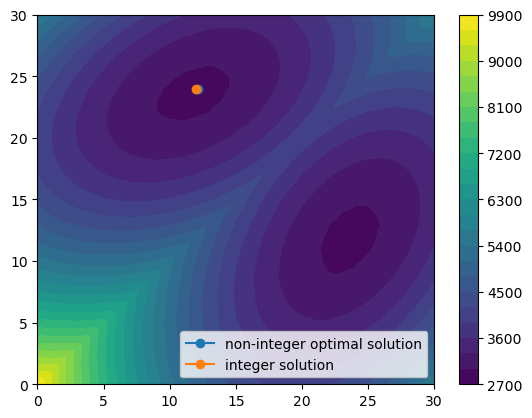

In [200]:
# Let us now sketch the graph of the function (the level sets) and its optimum

import matplotlib.pyplot as plt

# Graph in [0,25]x[0,25]
xmin = 0; xmax = 30;
ymin=0; ymax=30;
npts = 101; nlevels=25;
# Create a grid in the correct form to graph using meshgrid
[X,Y] = np.meshgrid(np.linspace(xmin, xmax,npts),np.linspace(ymin,ymax,npts))

# Calculate the profit function at all values we are going to plot
Z = np.zeros([npts,npts]);
for i in range(npts):
    for j in range(npts):
        Z[i,j] = time([0,X[i,j],Y[i,j]])

plt.contourf(X,Y,Z, nlevels);
plt.colorbar();
plt.plot(sol[1],sol[2],'-o'); # draw the optimal point
plt.plot([12],[24],'-o'); # draw the optimal point
# plt.plot([11],[23],'-o'); # draw the optimal point
plt.legend(['non-integer optimal solution','integer solution'],loc="lower right")

# plt.savefig('elevators-time.png')

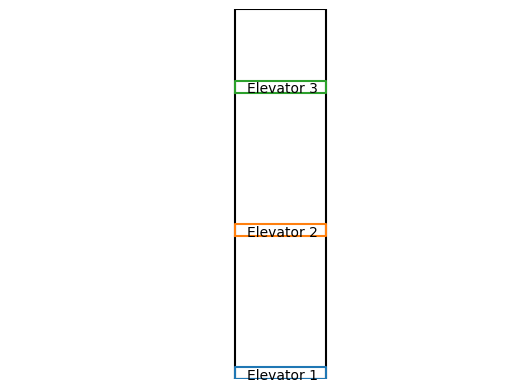

In [199]:
import matplotlib
import matplotlib.pyplot as plt


height=3
floors=30

plt.axis('off')
plt.xlim([-2.5*height,3*height]) #pylab.xlim([-400, 400])
plt.ylim([0, (floors+1)*height]) #pylab.ylim([-400, 400])


plt.plot([0,0,height,height,0],[0,(floors+1)*height,(floors+1)*height,0,0],'k') 

for i in range(3):
    pos = int(sol[i])
    plt.plot([0,0,height,height,0],[pos*height,(pos+1)*height,(pos+1)*height,pos*height,pos*height]) 
    string = 'Elevator '+str(i+1);
    plt.text(0.4,pos*height,string)

# plt.savefig('elevators-building.png')

In [236]:
# sol has the minimizer for the nominal value of the parameter (already run above)


# To calculate the numerical derivative, we need h
h = 0.1
p_nom = 1   # nominal value of the parameter
p = 1 + h   # new value of the parameter to calculate numerical derivative

# Function to optimize:
#   * x[i] = position of elevator number i
#   * parameter p to check sensitivity

def timep (x): 
    T = (p+min(x))*(2*10*30)
    for i in range(30):
        T += (p+min([abs(i-x[0]),abs(i-x[1]),abs(i-x[2])]))*2*10

    return T




# We want to maximize the profit, but python naturally minimizes functions, so define a new function that does the following
#  * - profit => so minimizing the new function is equivalent to maximizing the original profit function
#  * adds a large penalty when the variables x and y are negative 
time_pen = lambda x: timep(x) + 1000*((x[0]<0) + (x[1]<0) + (x[2]<0))

# Initial guess
x0=[5,10,15]

# Optimize the problem using the function fmin
sol_new = optimize.fmin(time_pen, x0)
# min_sol[i] = time(soltemp,pv[i])

time0 = time(sol)
time1 = timep(sol_new)

S = (time1-time0)*p_nom/(h*time0)

# Report the results
print()
print('Sensitivity is ', S)

Optimization terminated successfully.
         Current function value: 2954.700067
         Iterations: 124
         Function evaluations: 231

Sensitivity is  0.9999999999999941
